# Peer-programming with our AI Buddy
No doubt you heard about Generative AI (GenAI). In this session, we study how GenAI, specifically, ChatGPT can help us develop a Python script for analysis data. We consider a data set related to credit risk modeling and use ChatGPT to create codes for taking a first look at the data or, more formally, to engage in explanatory data analysis (EDA). The notebook provides four prompts, which have been tested and should work reasonably well. That said, there is no guarantee that these prompt lead ChatGPT to output code that is ready-to-use. As said, one learning goal of this session is to *study how GenAI can help us*. We should not expect it to do all the work ;)

We suggest you begin with the below prompts. Afterwards, you are most welcome to make changes, adjust the prompts, and examine how changes in your prompts change the generated codes; and by extension the effectiveness of the GenAI support. Let's move on with the first prompt.

## Prompt 1: Explanatory Data Analysis
You are a data scientist working for a major retail bank. You received a data set of past transactions. Specifically, the data set is available as an MS Excel file hmeq.xlsx. Each row represents one loan application, which is characterized by several attributes (i.e., the columns).
The table includes a binary target variable named "BAD", which indicates whether the credit was repaid (BAD==0) or not (BAD==1). Furthermore, the data set includes the following attributes:
- LOAN: amount of the loan request
- MORTDUE: amount due on an existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio

Your task is to write Python code to read the data from the Excel file and perform explanatory data analysis (EDA). The EDA step should involve the analysis of descriptive statistics of the attributes and make use of suitable visualizations to study their distribution. Bear in mind that the bank is very interested in the association between the attributes and the target. Therefore, your EDA should also comprise analysis/visualizations that shed light on the association of attributes and the target. Please make sure your analysis distinguishes properly between numerical attributes and categorical data.


   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  
               BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000   
mean      0.199497  18607.969799   73760.817530  101776.048741     8.922268   
std       0.399656  11207.480417   44457.609448   57385.775334     7.573982   
min       0.000000   11

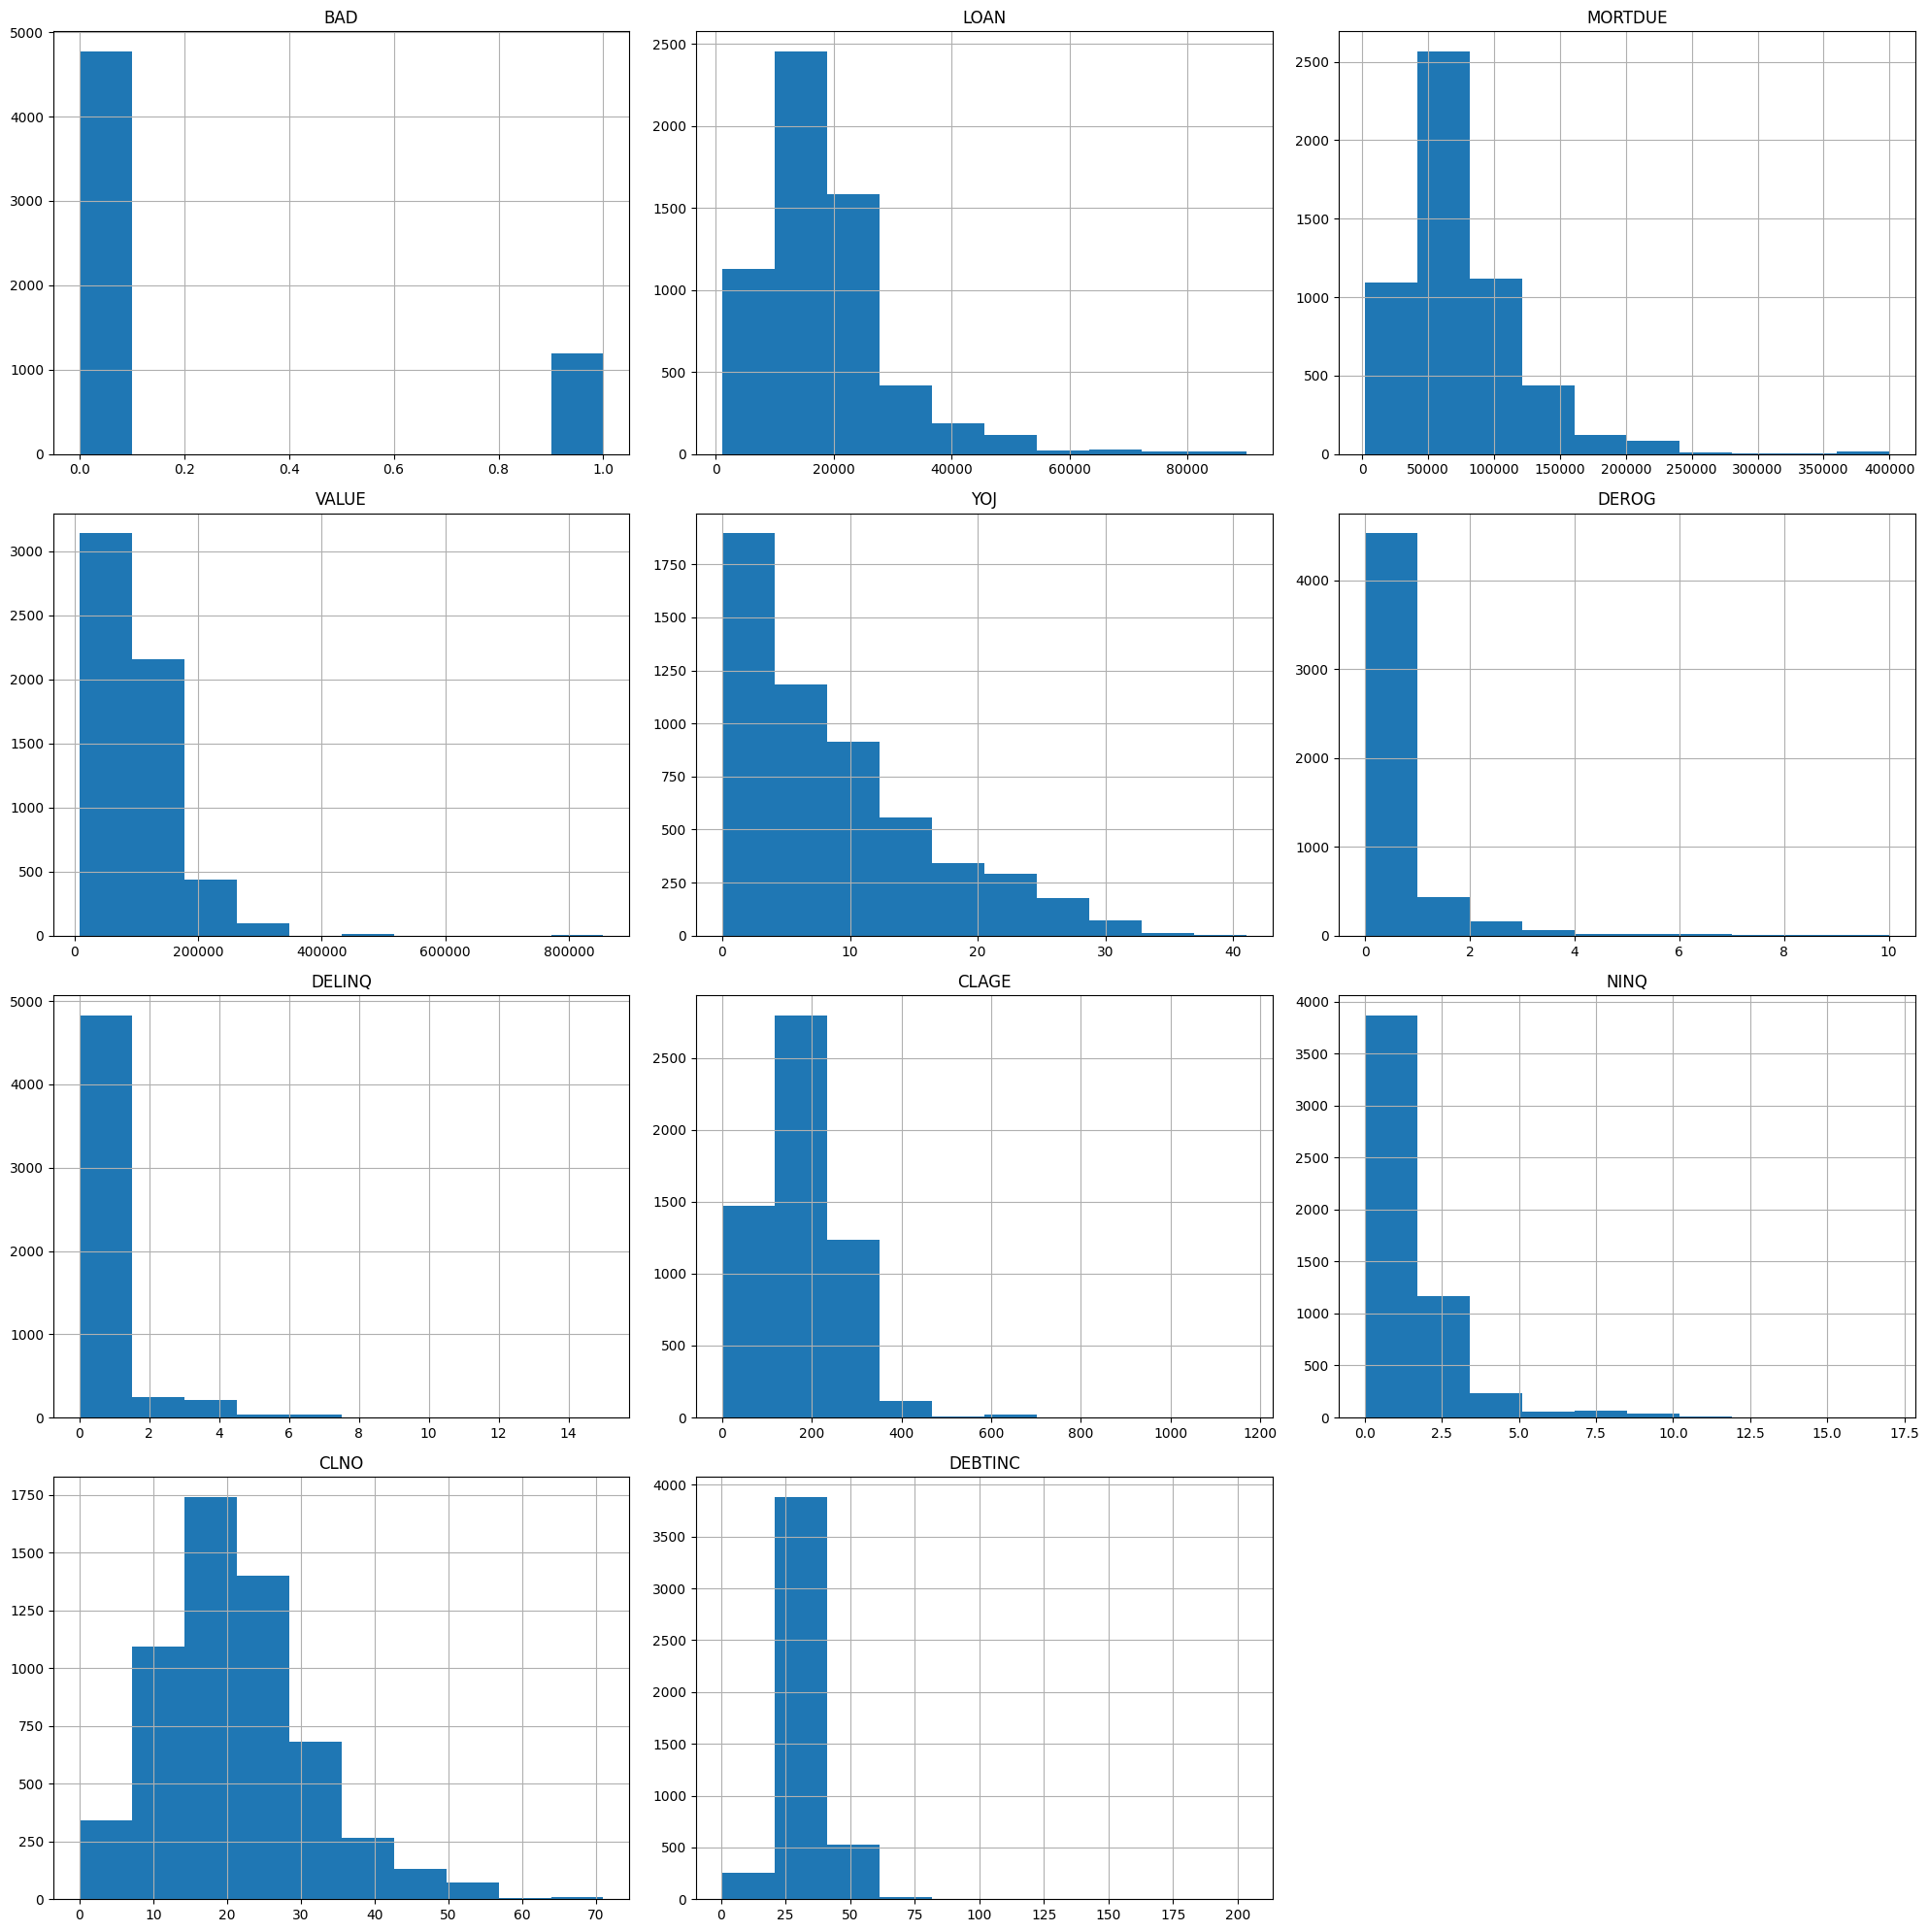

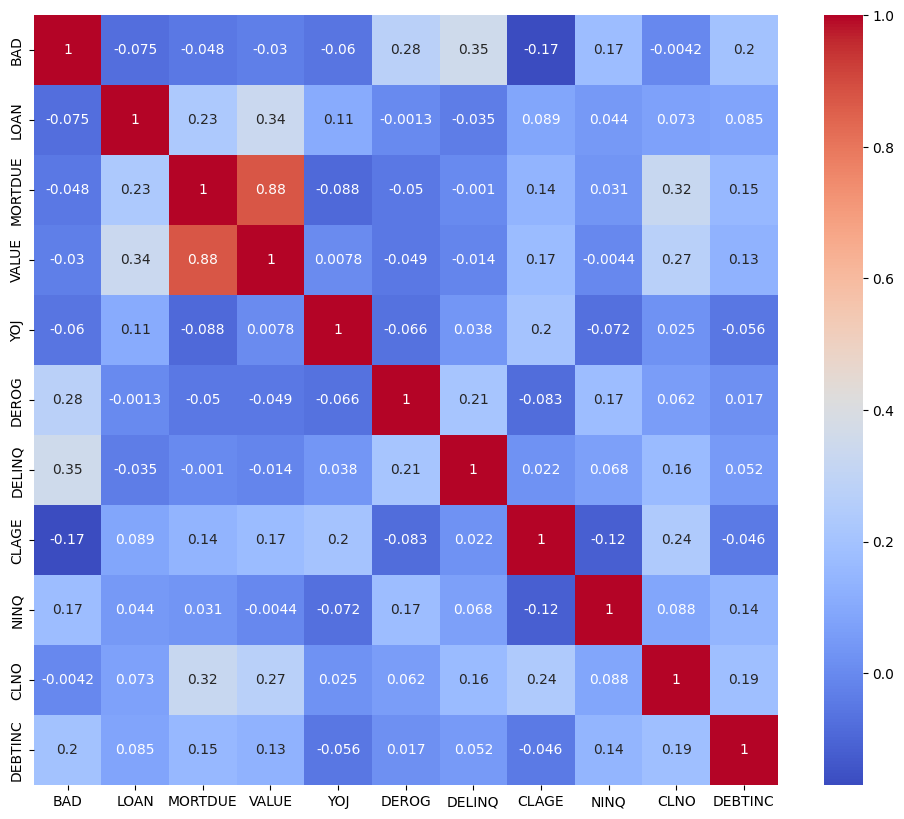

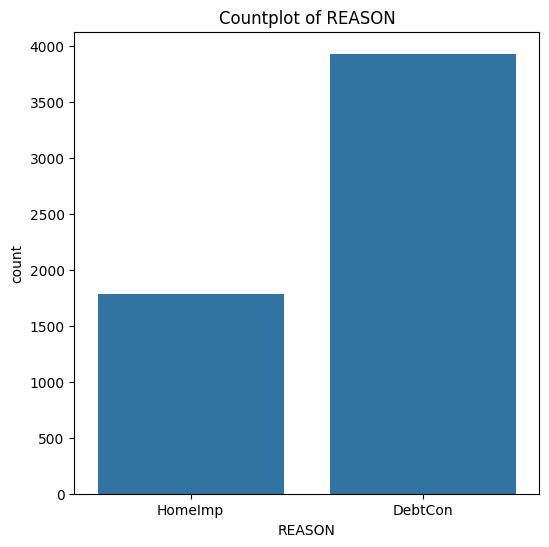

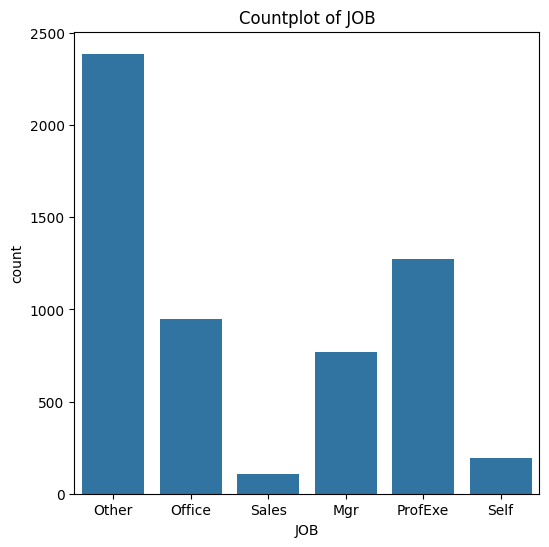

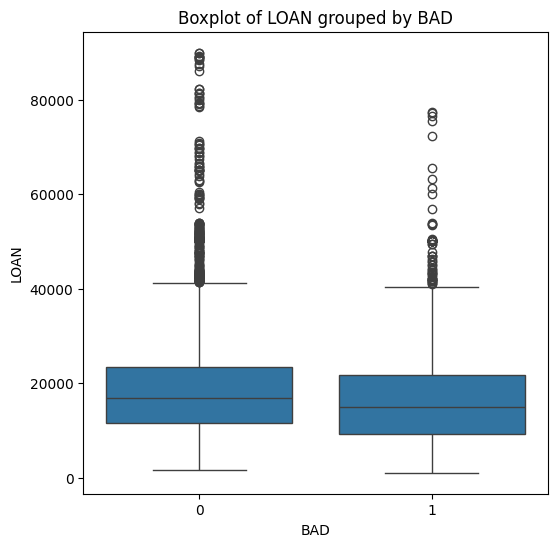

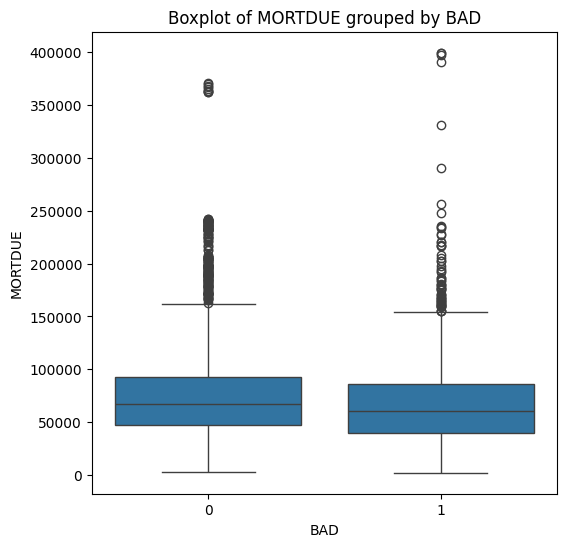

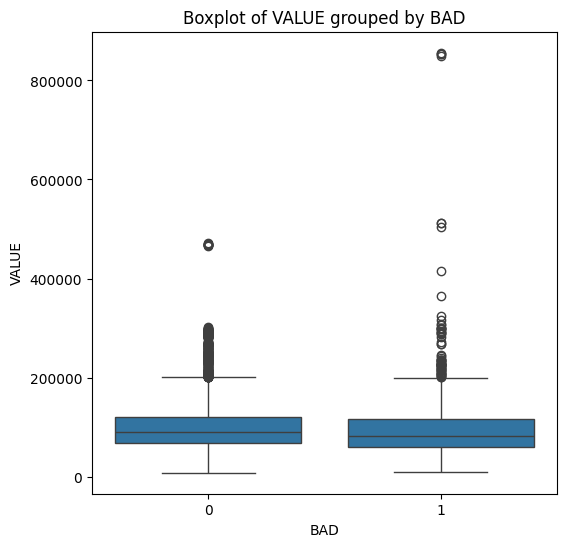

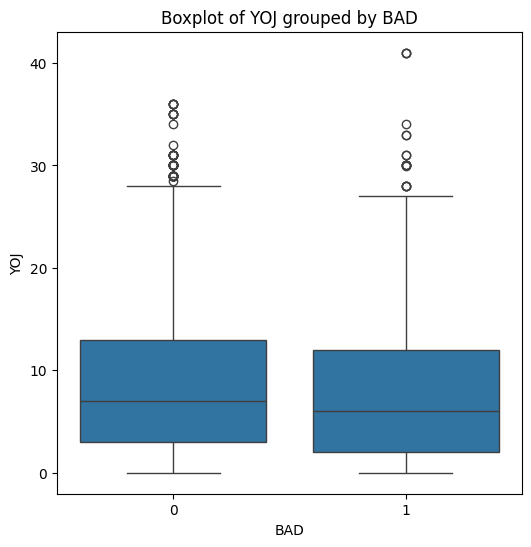

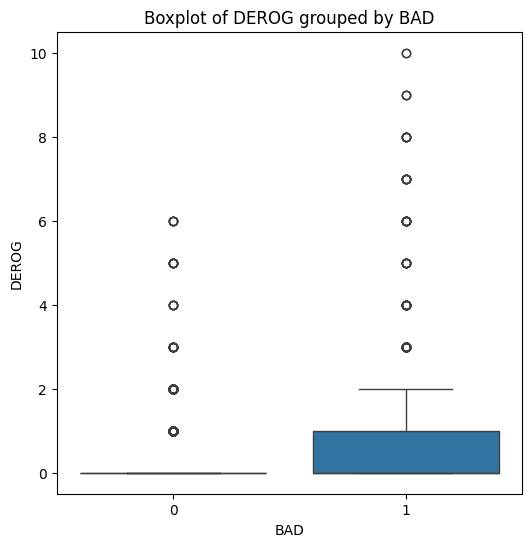

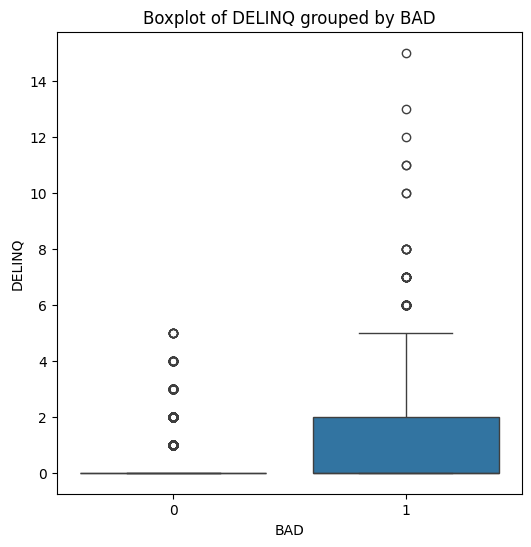

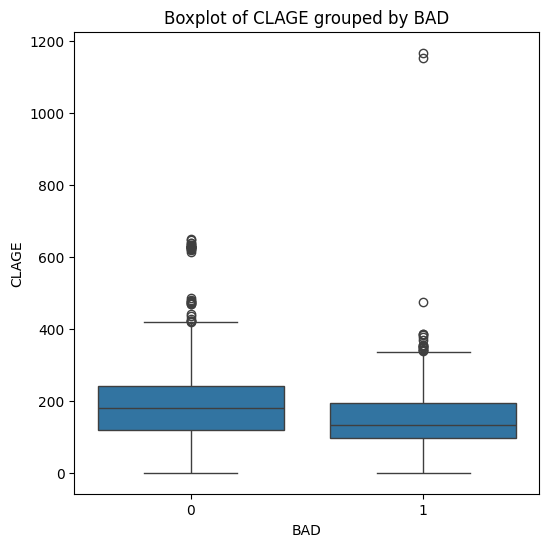

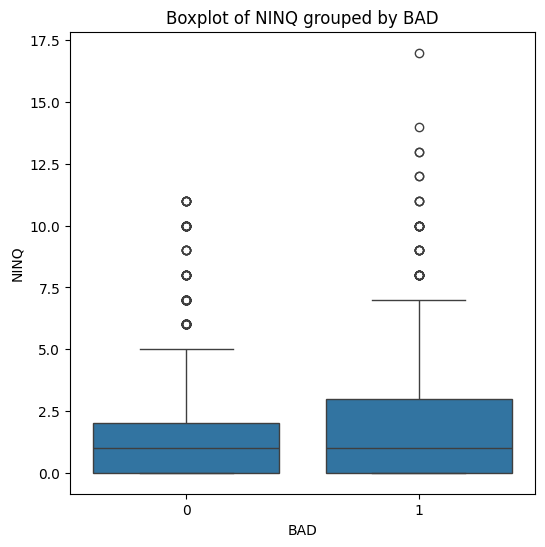

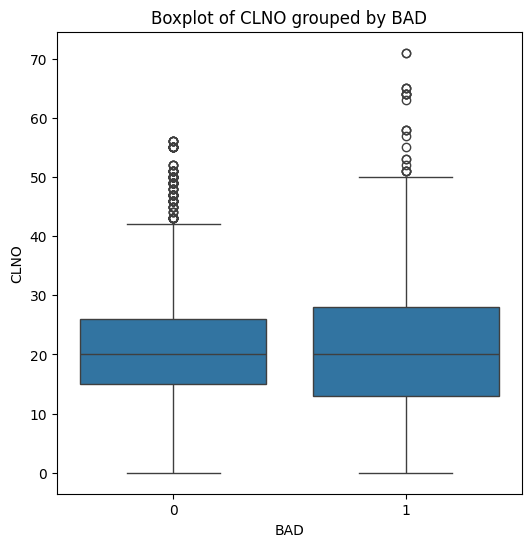

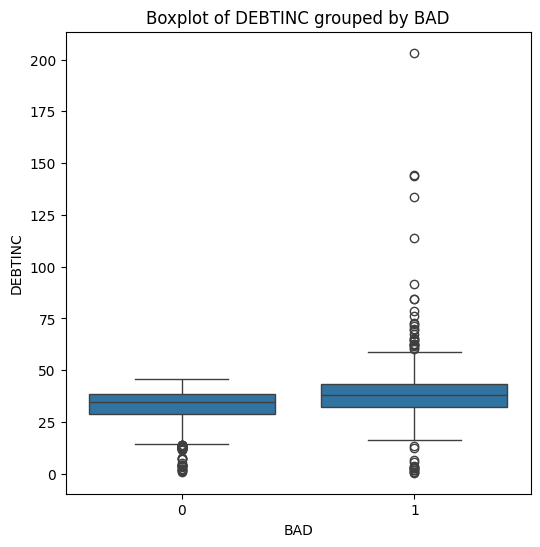

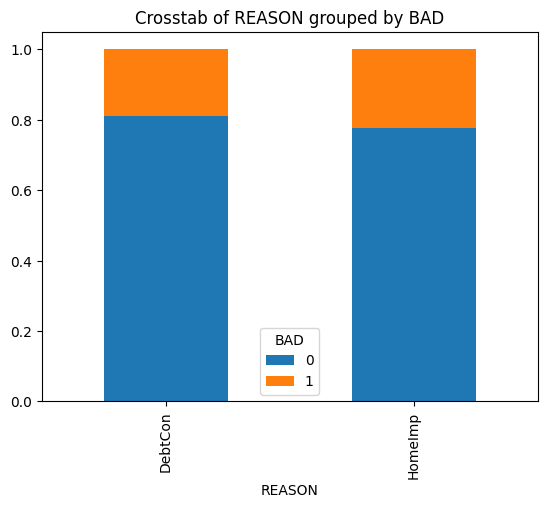

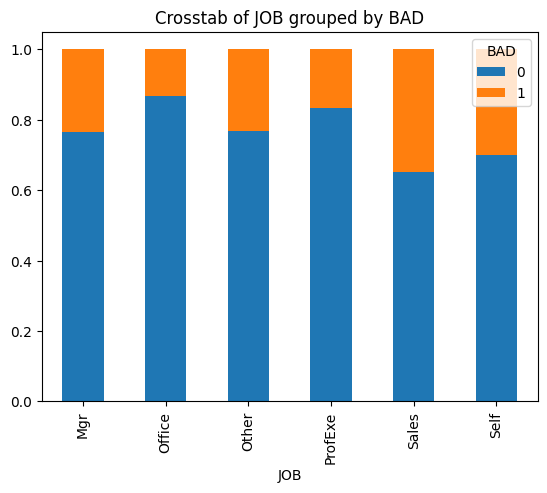

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('hmeq.xlsx')

# Display the first few rows of the dataframe
print(df.head())

# Display the summary statistics of the dataframe
print(df.describe())

# Plot histograms for each numerical column to understand the distribution
num_cols = df.select_dtypes(include=np.number).columns # select numerical columns
df[num_cols].hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

# Plot correlation matrix to understand the relationship between numerical variables
corr = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Plot countplots for each categorical column to understand the distribution
cat_cols = df.select_dtypes(exclude=np.number).columns # select categorical columns
for column in cat_cols:
    plt.figure(figsize=(6, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Countplot of {column}')
    plt.show()

# Plot boxplots for each numerical attribute against target variable to understand their association
for column in num_cols:
    if column != 'BAD':
        plt.figure(figsize=(6, 6))
        sns.boxplot(x='BAD', y=column, data=df)
        plt.title(f'Boxplot of {column} grouped by BAD')
        plt.show()

# Plot crosstabs for each categorical attribute against target variable to understand their association
for column in cat_cols:
    if column != 'BAD':
        ct = pd.crosstab(df[column], df['BAD'], normalize='index') # compute normalized crosstab
        ct.plot.bar(stacked=True) # plot stacked bar chart
        plt.title(f'Crosstab of {column} grouped by BAD')
        plt.show()


## Prompt 2: Missing Values
You mention missing values. These are indeed a problem in this data set. Please write Python code examine the severety of missing values for each attribute. Next, use a basic strategy to impute missing values in each attribute.

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the data
# df = pd.read_excel('hmeq.xlsx')

# Check the number of missing values in each column
print(df.isnull().sum())

# Impute missing values
# For numerical columns, we use mean imputation
num_cols = df.select_dtypes(include=np.number).columns
imputer = SimpleImputer(strategy='mean')
df[num_cols] = imputer.fit_transform(df[num_cols])

# For categorical columns, we use most frequent imputation
cat_cols = df.select_dtypes(exclude=np.number).columns
imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer.fit_transform(df[cat_cols])

# Check the number of missing values in each column after imputation
print(df.isnull().sum())


BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


## Prompt 3: Data Transformation
I noted that the distribution of some attributes show a strong peak at zero and a long tail with some few values far greater than zero. Can you suggest suitable data transformation that will make those variables more useful in a credit scorcard? Please write a Python function to apply those transformations to a specific attribute. Next use your function to transform the attributes:
DEROG
DELINQ
NINQ

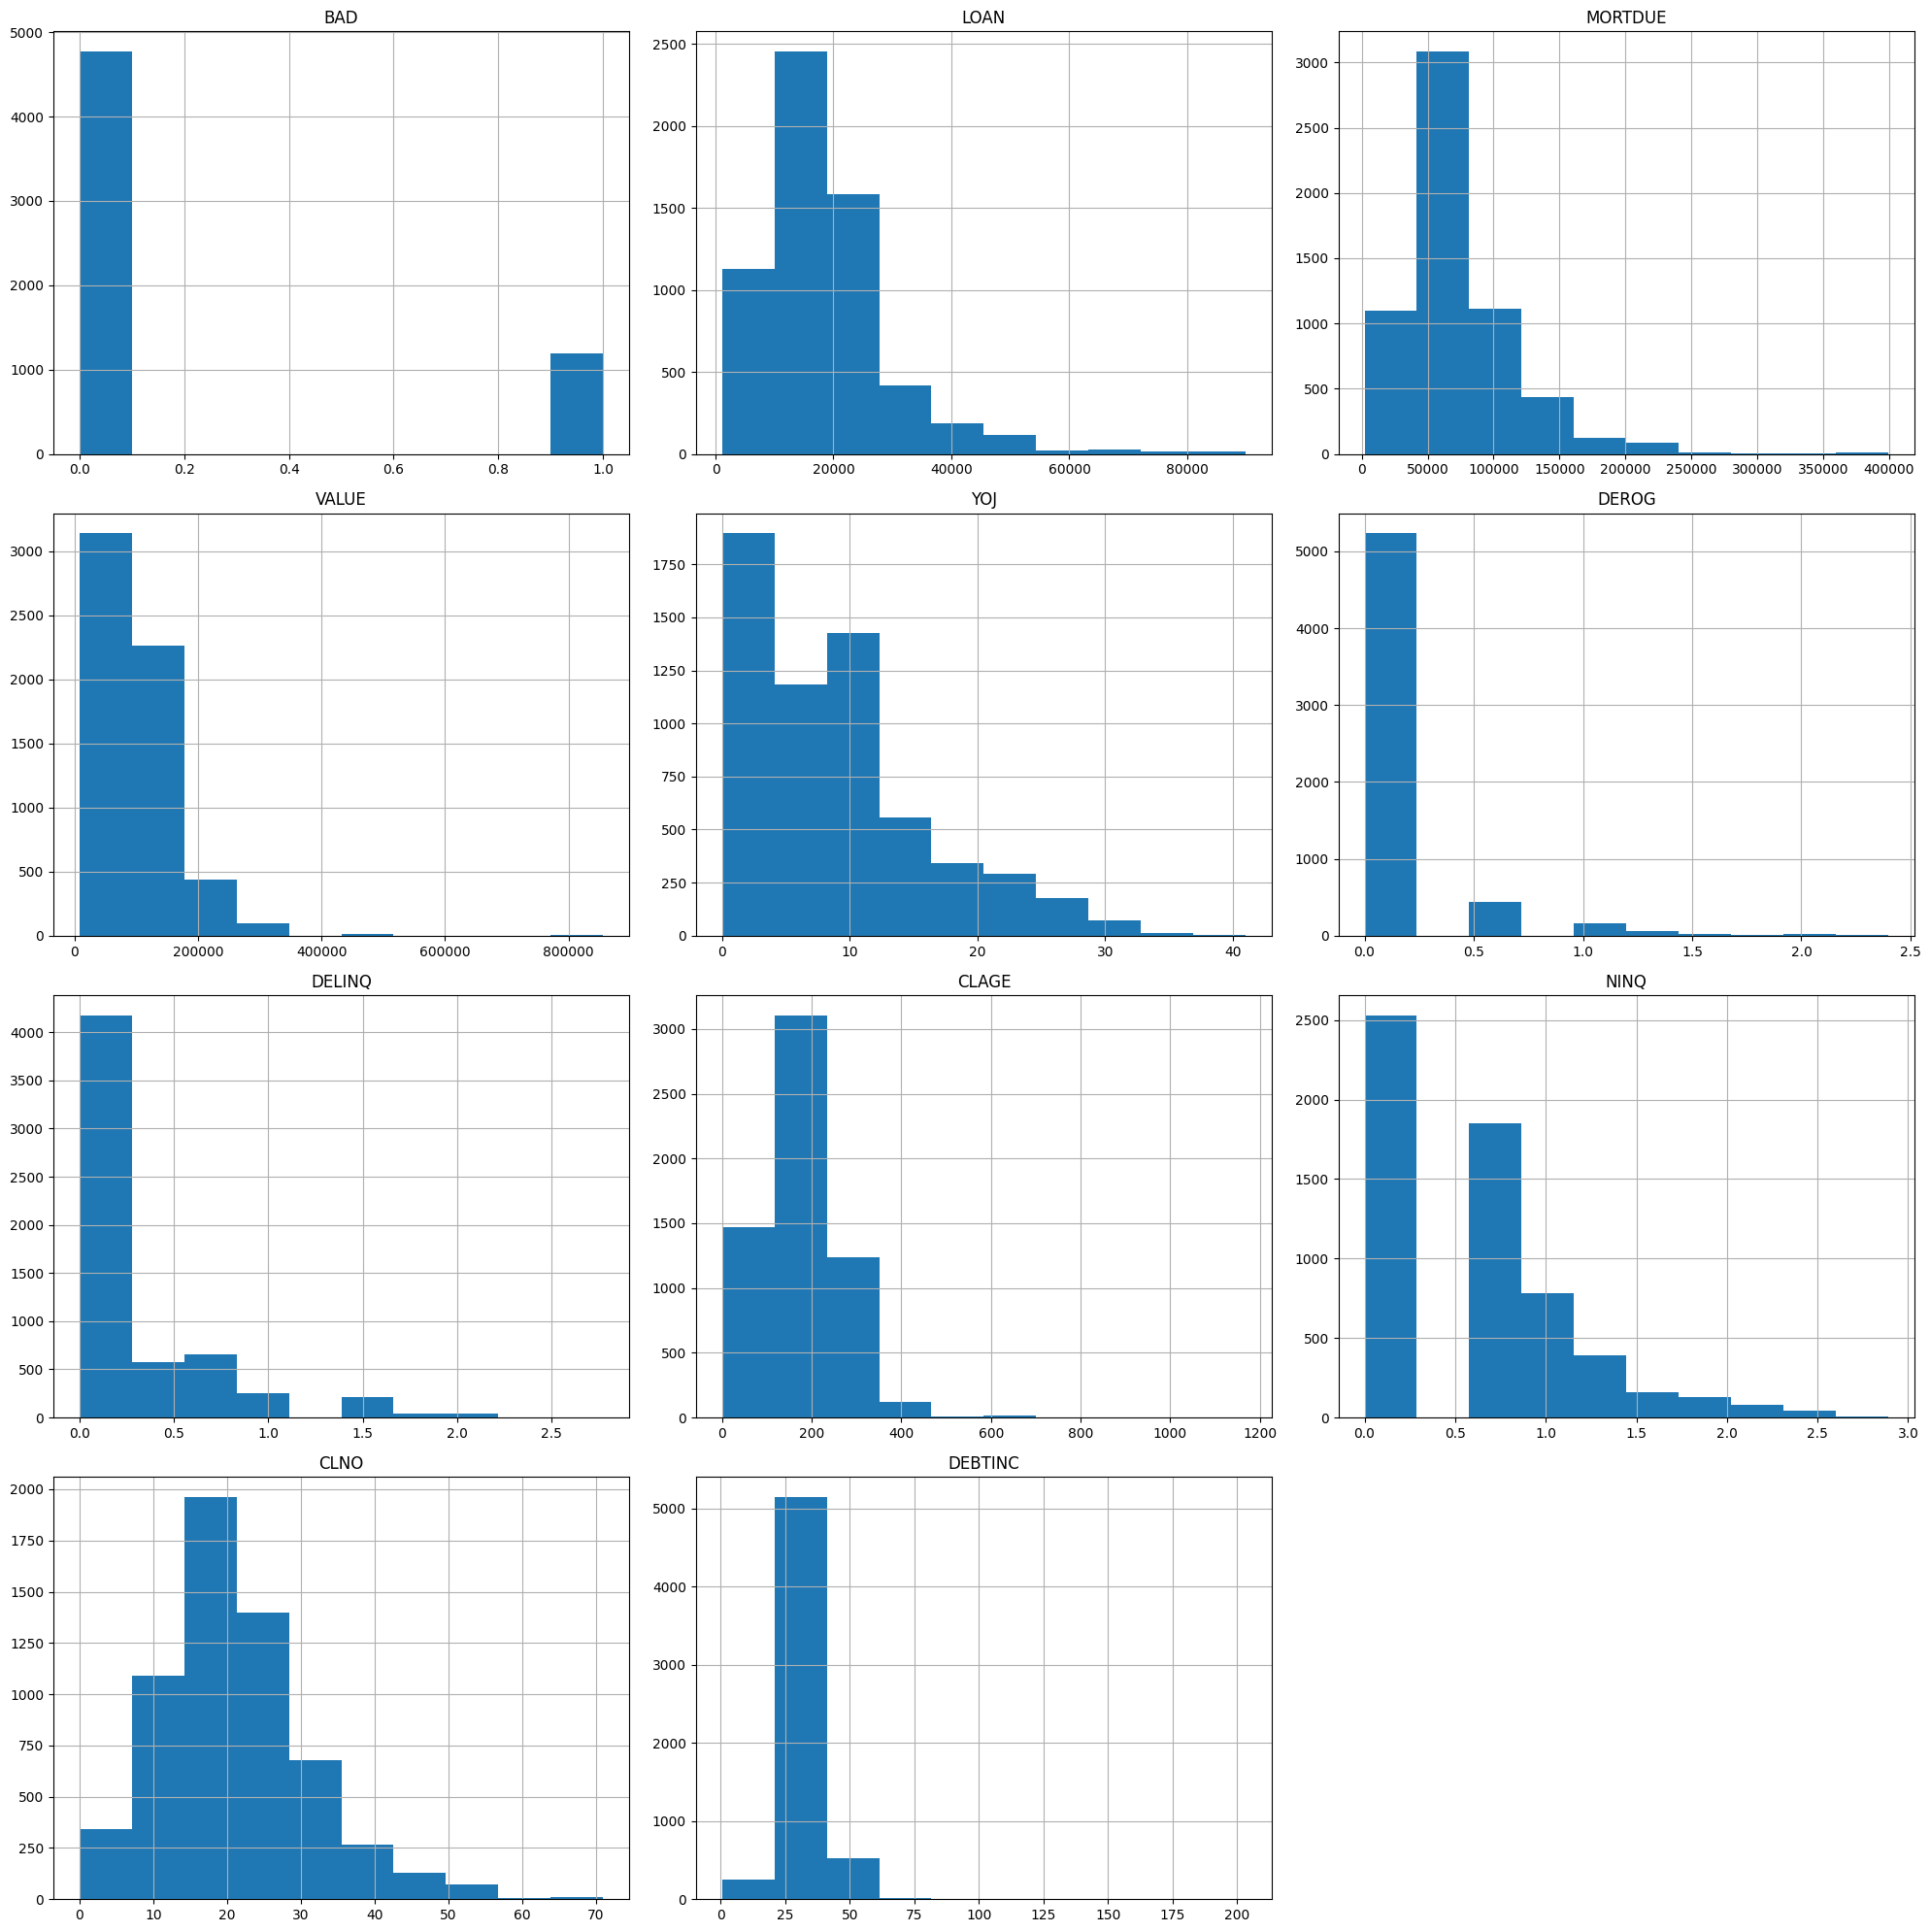

In [10]:
import numpy as np

def log_plus_one(df, column):
    df[column] = np.log1p(df[column])
    return df

df = log_plus_one(df, 'DEROG')
df = log_plus_one(df, 'DELINQ')
df = log_plus_one(df, 'NINQ')

# Plot histograms for each numerical column to understand the distribution
num_cols = df.select_dtypes(include=np.number).columns # select numerical columns
df[num_cols].hist(figsize=(20, 20))
plt.tight_layout()
plt.show()

## Prompt 4: Vanilla Machine Learning Workflow
Thanks for your help. I think the data is ready for training a machine learning model. Recall we aim to predict the target BAD from the attributes. Please write Python code for a vanilla machine learning workflow to do this. Make sure your code comprises the development of a predictive model and its evaluation. 

              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89       927
         1.0       0.70      0.34      0.45       265

    accuracy                           0.82      1192
   macro avg       0.76      0.65      0.67      1192
weighted avg       0.80      0.82      0.79      1192



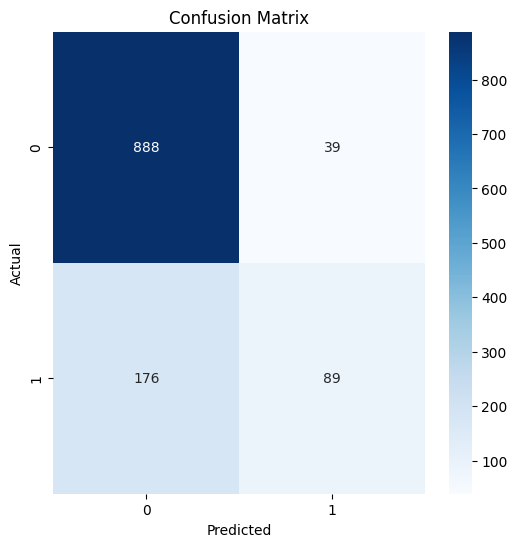

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the data
#df = pd.read_excel('hmeq.xlsx')

# Preprocess the data
# Convert categorical variables into dummy variables
df = pd.get_dummies(df, drop_first=True)

# Split the data into features and target variable
X = df.drop('BAD', axis=1)
y = df['BAD']

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [12]:
cm

array([[888,  39],
       [176,  89]], dtype=int64)